In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline
from sklearn.neighbors import KNeighborsRegressor
#train_test_split를 정의 해줘야 하기에 아래 라이브러리 만들어줍니다.
from sklearn.model_selection import train_test_split
#경고창 삭제하기
import warnings
warnings.filterwarnings('ignore')


#폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

In [5]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
X,y = make_moons(n_samples= 100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
#tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree= DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print("훈련 세트 점수: {: .3f}".format(tree.score(X_train,y_train)))
print("테스트 세트 점수: {: .3f}".format(tree.score(X_test,y_test)))

훈련 세트 점수:  1.000
테스트 세트 점수:  0.840


In [ ]:
#깊이 제한을 두지 않았기 때문에 제한 없이 결정트리 시도 한다

In [6]:
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)
print("훈련 세트 점수: {: .3f}".format(tree.score(X_train,y_train)))
print("테스트 세트 점수: {: .3f}".format(tree.score(X_test,y_test)))

훈련 세트 점수:  0.933
테스트 세트 점수:  0.800


In [ ]:
#깊이를 4로 두면 가지가 4개가 되기에 훈련 세트는 떨어지지만 큰 차이가 없다

In [ ]:
#cancer DATA의 깊이 따라서도 테스트 정확도를 알아보자

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data,cancer.target,stratify=cancer.target,random_state=42)
print("X_train.shape: {}".format(X_train.shape),"X_test.shape: {}".format(X_test.shape))
for max_depth in [1,4,8]:
    tree= DecisionTreeClassifier(max_depth=max_depth,random_state=0)
    tree.fit(X_train,y_train)
    print("max_depth={}",format(max_depth))
    print("훈련 세트 점수: {: .3f}".format(tree.score(X_train,y_train)))
    print("테스트 세트 점수: {: .3f}".format(tree.score(X_test,y_test)))

X_train.shape: (426, 30) X_test.shape: (143, 30)
max_depth={} 1
훈련 세트 점수:  0.923
테스트 세트 점수:  0.923
max_depth={} 4
훈련 세트 점수:  0.988
테스트 세트 점수:  0.951
max_depth={} 8
훈련 세트 점수:  1.000
테스트 세트 점수:  0.937


In [ ]:
#깊이가 커질수록 세트 점수는 가까워지나 테스트 점수는 달라짐을 알 수 있따

In [18]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file ="tree.dot",class_names=["악성","양성"],
               feature_names=cancer.feature_names,impurity=False,filled=True)
#이 파일을 읽어서 graphviz 모듈을 사용해 결정트리를 시각화 할 수 있다

In [20]:
print("특성 중요도 : \n{}".format(tree.feature_importances_))

특성 중요도 : 
[0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]


In [ ]:
#특성 중요도에 이 값은 0과 1 사이의 숫자로, 각 특성에 대해 0은 전혀 사용되지 않고
#1은 완벽하게 타깃 클래스를 예측 했다는 것을 나 타낸다
#특성 중요도의 전체 합은 1이다
#중요도가 낮다고 해서 유용하지 않은 것은 아니다

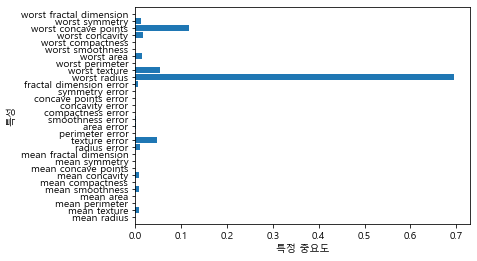

In [28]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features),cancer.feature_names)
    plt.xlabel("특정 중요도")
    plt.ylabel("특성")
    plt.ylim(-1,n_features)

plot_feature_importances_cancer(tree)

In [ ]:
#특성 중요도 시각화를 하였습니다

In [ ]:
#첫 번째 노드에서 사용한 특성 worst radius 가 가장 중요한 특성으로 나타 납니다
#이 그래프르 통해 첫 번째 노드에서 두 클래스를 꽤 잘 나누고 있다는 것을 보여 분디다.
#선형 모델의 계수와는 달리, 특성 중요도는 항상 양수인 것이 보입니다
#중요성만 알려주지 높은 반지름이 양성을 의미하는지 악성을 의미하는지는 알수 없다.


ram_prices.shape: (333, 3)
ram_prices.keys: Index(['Unnamed: 0', 'date', 'price'], dtype='object')
   Unnamed: 0    date        price
0           0  1957.0  411041792.0
1           1  1959.0   67947725.0
2           2  1960.0    5242880.0
3           3  1965.0    2642412.0
4           4  1970.0     734003.0


Text(0, 0.5, '가격')

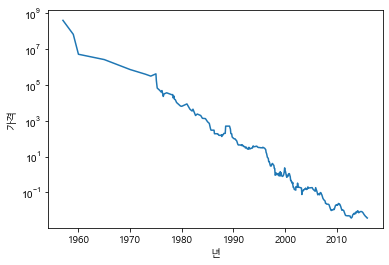

In [36]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,"ram_price.csv"))

print("ram_prices.shape: {}".format(ram_prices.shape))
print("ram_prices.keys: {}".format(ram_prices.keys()))
print("{}".format(ram_prices[:5]))

plt.yticks(fontname='Arial')
plt.semilogy(ram_prices.date,ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격")




In [ ]:
#그래프를 로그스케일로 그리면 약간의 굴곡을 제외 하고는 선형적으로 나타나서 예측하기 쉽다
#결정트리 회귀의 장점이라 볼 수 있다

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


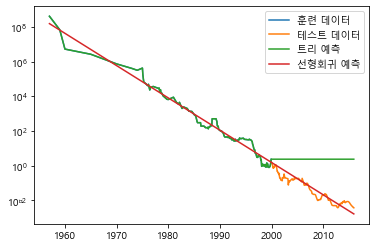

In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

#2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만들기
data_train =ram_prices[ram_prices.date<2000]
data_test =ram_prices[ram_prices.date>=2000]

#가격 예측을 위해 날짜 특성만을 이용하기
X_train = data_train.date[:,np.newaxis]
#데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 전환
y_train = np.log(data_train.price)
tree= DecisionTreeRegressor().fit(X_train,y_train)
linear_reg= LinearRegression().fit(X_train,y_train)

#예측은 전체 기간에 대해서 수행
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

#예측 값을 로그 스케일로 되돌리기
price_tree = np.exp(pred_tree)
price_lr= np.exp(pred_lr)

plt.semilogy(data_train.date,data_train.price,label="훈련 데이터")
plt.semilogy(data_test.date,data_test.price,label="테스트 데이터")
plt.semilogy(ram_prices.date,price_tree,label="트리 예측")
plt.semilogy(ram_prices.date,price_lr,label="선형회귀 예측")
plt.legend()

In [ ]:
# 두 모델의 확연 차이를 볼 수가 있었다. 선형 모델은 우리가 아느대로 직선이고
#데이터가 근사하지만
#트리모델은 훈련 데이터를 완벽하게 예측하였다.
#결정 트리의 주요 단점은 사전 가지치기를 사용함에도 불구하고 과대적합되는 경햐이 있어 일반화
#성능이 좋지 않다는 것을 알 수가 있었다.